<a href="https://colab.research.google.com/github/babupallam/Deep-Learning-DL-03-Neural-Network-Architectures/blob/main/2_1_Introduction_to_CNN_Implementation_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: PyTorch Overview


PyTorch is an open-source machine learning library developed by Facebook AI Research (FAIR) and is widely used for developing deep learning models. PyTorch’s dynamic computation graph allows for greater flexibility and ease of experimentation, making it particularly suited for tasks such as computer vision, where Convolutional Neural Networks (CNNs) play a key role.



## 1.1 Key Features of PyTorch



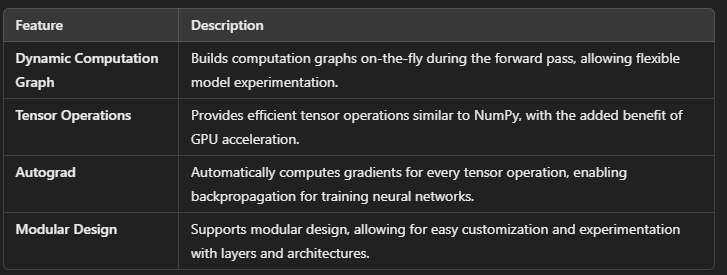

### Dynamic Computation Graph


One of the standout features of PyTorch is its dynamic computation graph. This means that the computation graph is built at runtime as operations are executed. It offers a lot of flexibility for researchers and developers to modify the model’s architecture on the fly, allowing for easier debugging and experimentation. This dynamic nature contrasts with static computation graphs (like those used in TensorFlow 1.x), where the graph needs to be defined before execution.



### Autograd: Automatic Differentiation


PyTorch’s Autograd system handles automatic differentiation, which is crucial for backpropagation during training. Autograd records operations performed on tensors so that when it’s time to backpropagate, it can efficiently compute the gradients needed for optimizing the model parameters. This allows the network to update weights and learn through backpropagation with minimal user intervention.



### Tensors with GPU Acceleration


PyTorch has an efficient tensor library that supports operations on multi-dimensional arrays (tensors). PyTorch tensors are similar to NumPy arrays but come with the added advantage of GPU support. This enables fast computations, especially when dealing with large datasets or deep neural networks.



## 1.2 PyTorch in Comparison with Other Frameworks


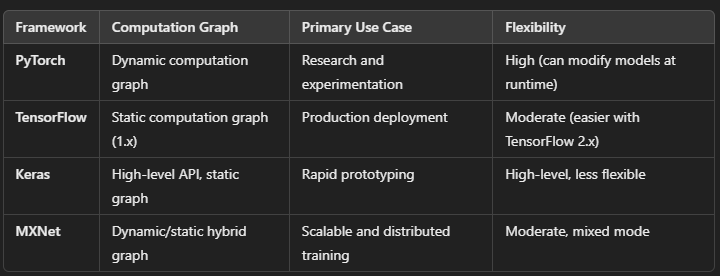

## 1.3 Key Concepts in PyTorch


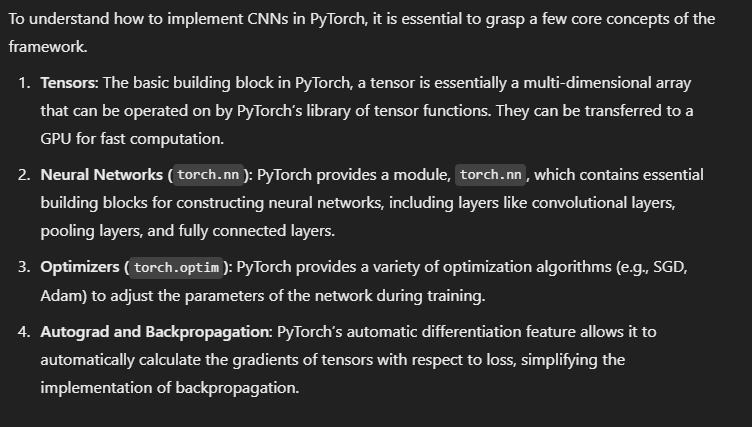

## 1.4 Advantages of Using PyTorch for CNNs


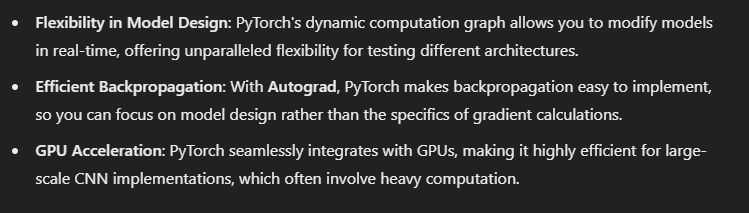

# Section 2: CNN Building Blocks in PyTorch


CNNs are built using various modular components such as convolutional layers, pooling layers, and fully connected layers. Each of these components plays a crucial role in the overall architecture and functioning of the CNN.



## 2.1 Convolutional Layers in PyTorch


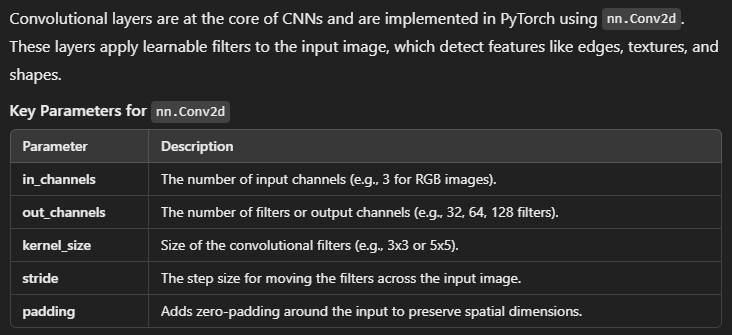

In [1]:
import torch.nn as nn
conv_layer = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)


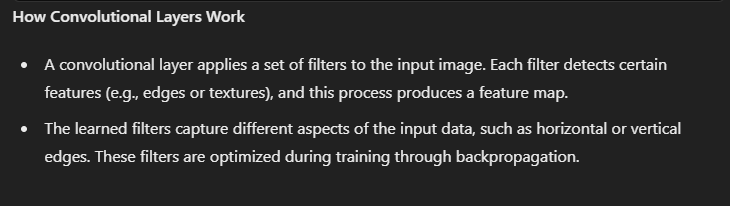

## 2.2 Pooling Layers in PyTorch


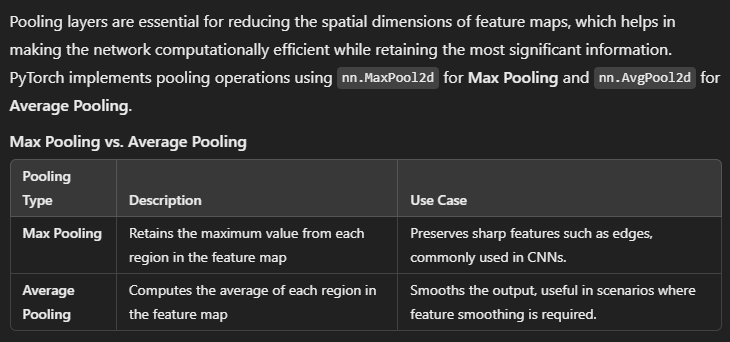

In [2]:
pool_layer = nn.MaxPool2d(kernel_size=2, stride=2)


## 2.3 Fully Connected Layers in PyTorch


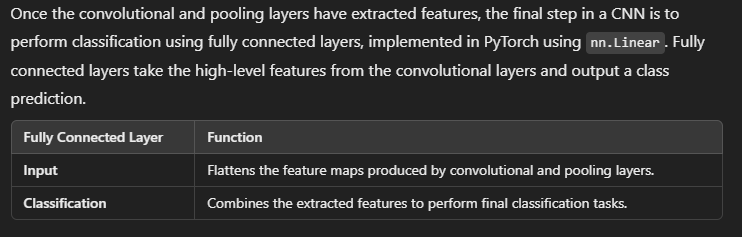

In [3]:
fc_layer = nn.Linear(in_features=512, out_features=10)  # 10 output classes for CIFAR-10


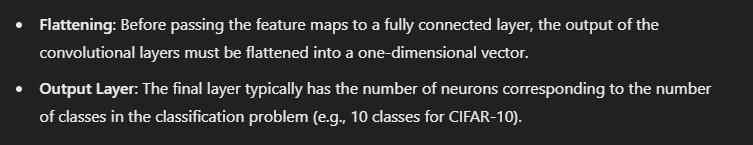

# Section 3: Building a Basic CNN for CIFAR-10 in PyTorch


In this section, we will implement a basic Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset using PyTorch. CIFAR-10 is one of the most commonly used datasets for image classification tasks. It consists of 60,000 32x32 color images in 10 different classes, including categories such as airplanes, cars, birds, and cats.



## 3.1 Overview of the CIFAR-10 Dataset


The CIFAR-10 dataset is a standard benchmark dataset in machine learning and computer vision tasks. It is composed of 60,000 labeled images, each 32x32 pixels in size, divided into 10 different categories. Each category has 6,000 images, and the dataset is split into 50,000 training images and 10,000 test images.



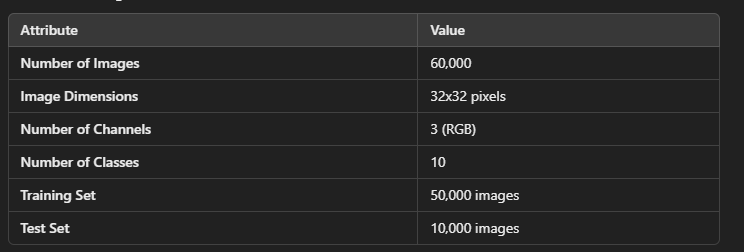

## 3.2 Defining the CNN Architecture for CIFAR-10


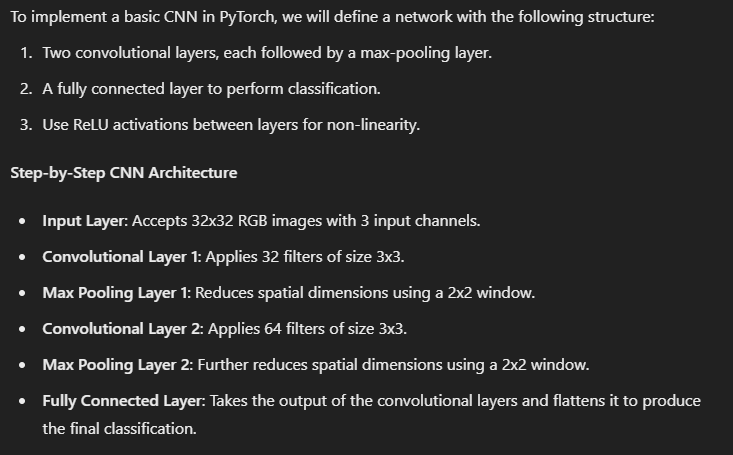

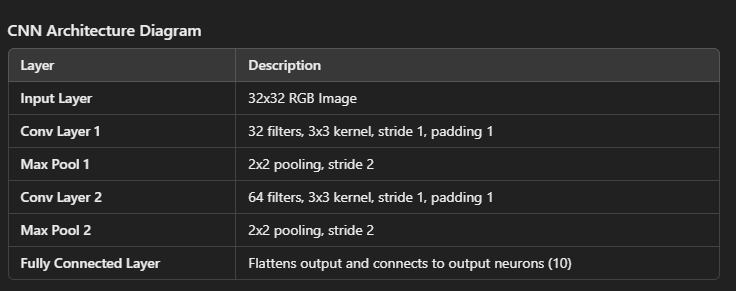

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the CNN architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # First convolutional layer: input channels = 3 (RGB), output channels = 32, kernel size = 3
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        # First max pooling layer: 2x2 window
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Second convolutional layer: input channels = 32, output channels = 64, kernel size = 3
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        # Fully connected layer: input size = 8x8x64 (after pooling), output size = 10 (CIFAR-10 classes)
        self.fc1 = nn.Linear(64 * 8 * 8, 10)

    def forward(self, x):
        # Apply first convolutional layer, followed by ReLU activation and max pooling
        x = self.pool(F.relu(self.conv1(x)))
        # Apply second convolutional layer, followed by ReLU activation and max pooling
        x = self.pool(F.relu(self.conv2(x)))
        # Flatten the output from the convolutional layers
        x = x.view(-1, 64 * 8 * 8)
        # Apply fully connected layer for classification
        x = self.fc1(x)
        return x


## 3.3 Training the CNN


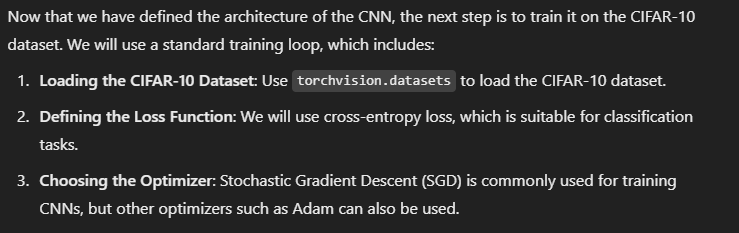

In [5]:
import torch.optim as optim
from torchvision import datasets, transforms

# Define the transformations for the CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load the training and testing data
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True, num_workers=2)

testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

# Initialize the CNN model
model = SimpleCNN()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training loop
for epoch in range(10):  # Loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get the inputs and labels
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 batches
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')


100%|██████████| 170498071/170498071 [00:02<00:00, 83459716.44it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
[Epoch 1, Batch 100] loss: 2.206
[Epoch 1, Batch 200] loss: 2.030
[Epoch 1, Batch 300] loss: 1.919
[Epoch 1, Batch 400] loss: 1.847
[Epoch 1, Batch 500] loss: 1.794
[Epoch 2, Batch 100] loss: 1.747
[Epoch 2, Batch 200] loss: 1.692
[Epoch 2, Batch 300] loss: 1.669
[Epoch 2, Batch 400] loss: 1.641
[Epoch 2, Batch 500] loss: 1.602
[Epoch 3, Batch 100] loss: 1.579
[Epoch 3, Batch 200] loss: 1.535
[Epoch 3, Batch 300] loss: 1.510
[Epoch 3, Batch 400] loss: 1.497
[Epoch 3, Batch 500] loss: 1.479
[Epoch 4, Batch 100] loss: 1.453
[Epoch 4, Batch 200] loss: 1.427
[Epoch 4, Batch 300] loss: 1.404
[Epoch 4, Batch 400] loss: 1.400
[Epoch 4, Batch 500] loss: 1.373
[Epoch 5, Batch 100] loss: 1.359
[Epoch 5, Batch 200] loss: 1.349
[Epoch 5, Batch 300] loss: 1.312
[Epoch 5, Batch 400] loss: 1.324
[Epoch 5, Batch 500] loss: 1.299
[Epoch 6, Batch 100] loss: 1.274
[Epoch 6, Batch 200] loss: 1.282
[Epoch 6, Batch 300]

## 3.4 Evaluating the CNN on the Test Set


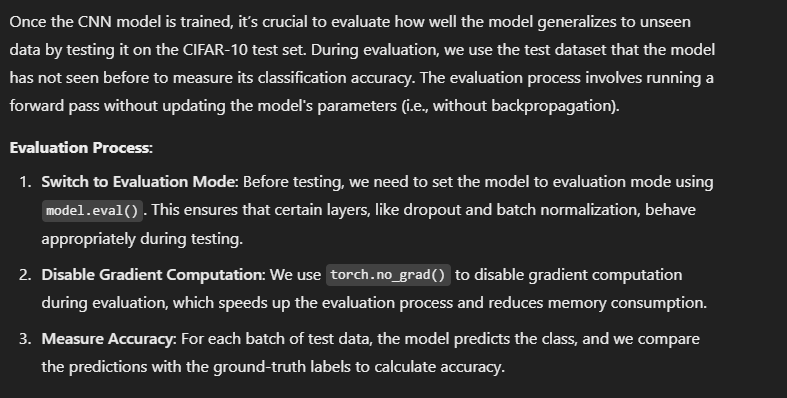

In [7]:
correct = 0
total = 0

# Switch to evaluation mode
model.eval()

# Disable gradient calculation for faster evaluation
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Perform a forward pass to get the predictions
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)  # Get the index of the highest logit value
        total += labels.size(0)  # Total number of labels (images)
        correct += (predicted == labels).sum().item()  # Count correct predictions

# Calculate the accuracy of the model on the test dataset
accuracy = 100 * correct / total
print(f'Accuracy on the 10,000 test images: {accuracy:.2f}%')


Accuracy on the 10,000 test images: 59.84%


## 3.5 Improving the CNN: Strategies for Enhancing Performance


Once the basic CNN is implemented and evaluated, there are several strategies we can employ to improve the model's performance. These strategies can help the network learn more effectively and improve its accuracy.



### 1. Data Augmentation


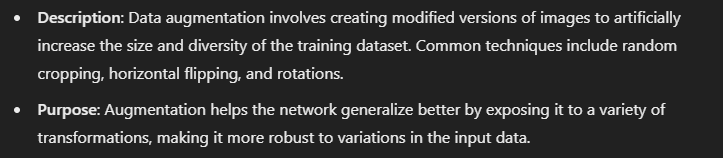

In [ ]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


### 2. Batch Normalization


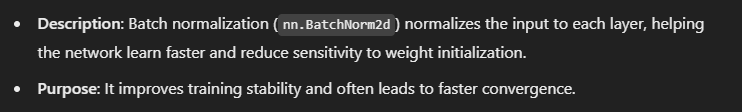

In [ ]:
# Example of adding batch normalization after a convolutional layer
self.bn1 = nn.BatchNorm2d(32)


### 3. Using Deeper Architectures


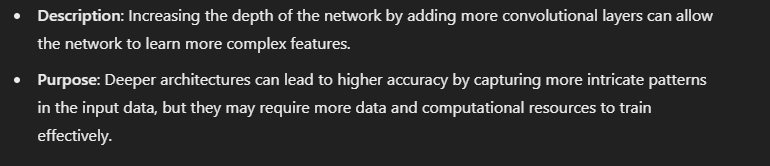

### 4. Optimizer Tuning


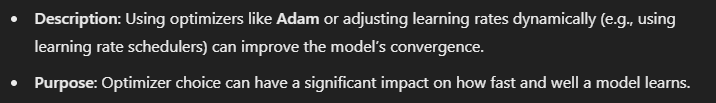

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)


### 5. Regularization Techniques


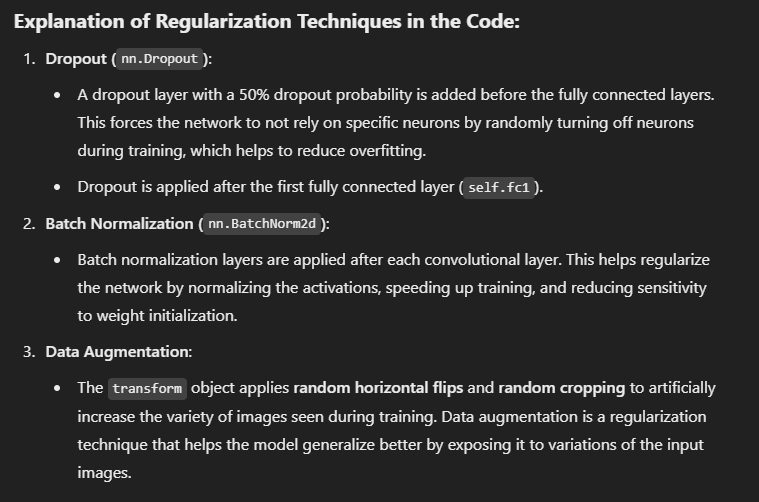

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define the CNN architecture with Dropout
class CNNWithDropout(nn.Module):
    def __init__(self):
        super(CNNWithDropout, self).__init__()
        # First convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)  # Add batch normalization to regularize training
        # Second convolutional layer
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        # Max pooling
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Dropout layer with 50% probability
        self.dropout = nn.Dropout(0.5)
        # Fully connected layer
        self.fc1 = nn.Linear(64 * 8 * 8, 512)  # Fully connected layer before classification
        self.fc2 = nn.Linear(512, 10)  # Output layer for CIFAR-10 classes

    def forward(self, x):
        # Convolutional layer 1, followed by ReLU, batch normalization, and max pooling
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        # Convolutional layer 2, followed by ReLU, batch normalization, and max pooling
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        # Flatten the feature maps into a single vector for the fully connected layers
        x = x.view(-1, 64 * 8 * 8)
        # Fully connected layer followed by ReLU and Dropout
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout to reduce overfitting
        # Final fully connected layer for classification
        x = self.fc2(x)
        return x

# Define the data transformation and augmentation for CIFAR-10
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Data augmentation: randomly flip the images
    transforms.RandomCrop(32, padding=4),  # Data augmentation: randomly crop the images
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the images
])

# Load CIFAR-10 training and test datasets
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True, num_workers=2)

testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

# Initialize the CNN model
model = CNNWithDropout()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training the model
num_epochs = 3
for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()  # Set the model to training mode
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()  # Zero the parameter gradients

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Print loss statistics
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}], Batch [{i + 1}], Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

print('Training complete.')

# Evaluate the model
correct = 0
total = 0
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the 10,000 test images: {accuracy:.2f}%')


Files already downloaded and verified
Files already downloaded and verified
Epoch [1/3], Batch [100], Loss: 2.0893
Epoch [1/3], Batch [200], Loss: 1.8454
Epoch [1/3], Batch [300], Loss: 1.7435
Epoch [1/3], Batch [400], Loss: 1.6780
Epoch [1/3], Batch [500], Loss: 1.6053
Epoch [2/3], Batch [100], Loss: 1.5711
Epoch [2/3], Batch [200], Loss: 1.5101
Epoch [2/3], Batch [300], Loss: 1.4921
Epoch [2/3], Batch [400], Loss: 1.4764
Epoch [2/3], Batch [500], Loss: 1.4396
Epoch [3/3], Batch [100], Loss: 1.4130
Epoch [3/3], Batch [200], Loss: 1.4019
Epoch [3/3], Batch [300], Loss: 1.4000
Epoch [3/3], Batch [400], Loss: 1.3499
Epoch [3/3], Batch [500], Loss: 1.3436
Training complete.
Accuracy on the 10,000 test images: 54.79%
